In [157]:
import pandas as pd 
import sweetviz as sv
import missingno as msno

In [158]:
df_initial=pd.read_csv("/home/apprenant/Documents/DATA/loan_project/SBAnational.csv")

/tmp/ipykernel_4424/550417617.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_initial=pd.read_csv("/home/apprenant/Documents/DATA/loan_project/SBAnational.csv")


In [159]:
df_initial.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"


In [160]:
len(df_initial)

899164

In [161]:
df_initial.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [197]:
df_initial[["ApprovalDate","ApprovalFY"]]

,ApprovalDate,ApprovalFY
0,28-Feb-97,1997
1,28-Feb-97,1997
2,28-Feb-97,1997
3,28-Feb-97,1997
4,28-Feb-97,1997
...,...,...
899159,27-Feb-97,1997
899160,27-Feb-97,1997
899161,27-Feb-97,1997
899162,27-Feb-97,1997


In [162]:

# df_initial['ApprovalFY'] = df_initial['ApprovalFY'].replace('A', '', regex=True).astype(int) # parceque le ytpe de cette column est "mixed-integer'
# report = sv.analyze(df_initIal)
# report.show_html('report.html')

In [163]:
df_test=df_initial.loc[:,["State","NAICS","DisbursementGross","NewExist","Term","SBA_Appv","MIS_Status"]]

<AxesSubplot:>

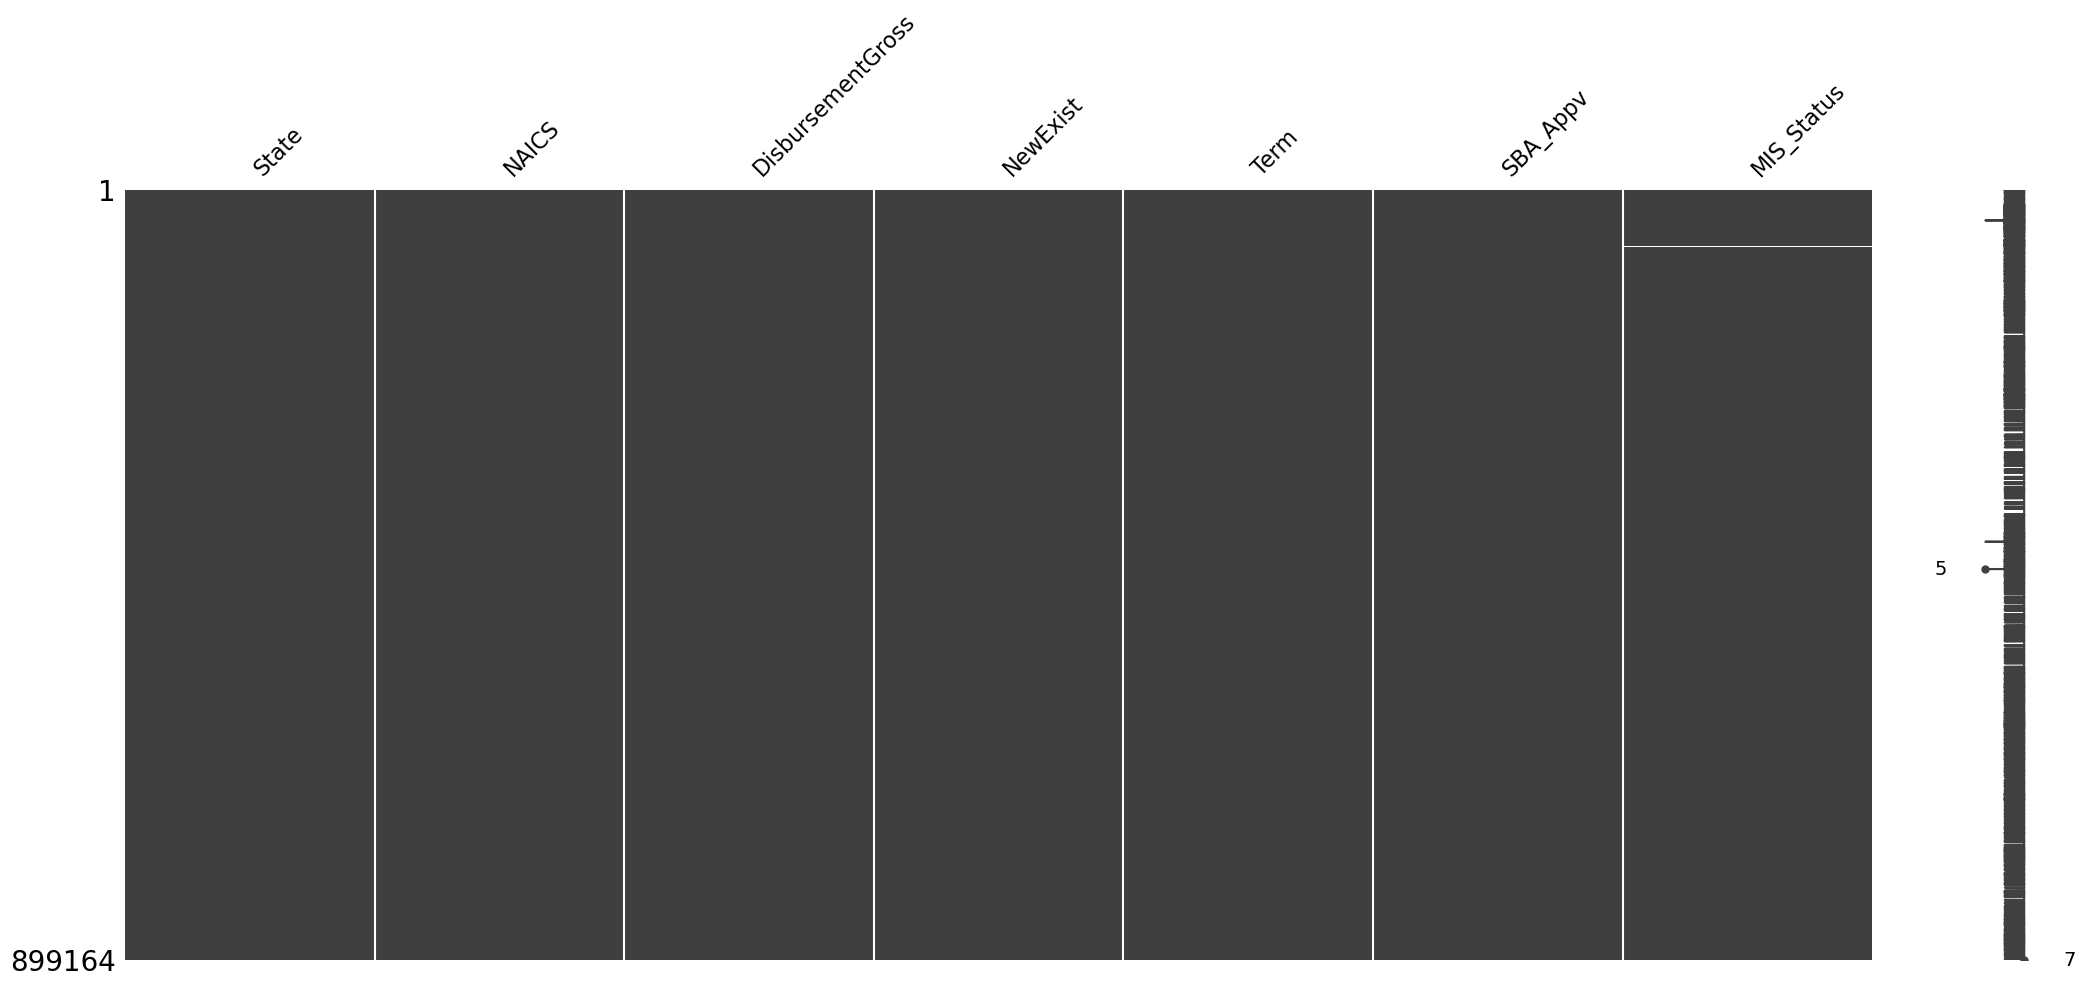

In [164]:
msno.matrix(df_test)

In [165]:
missing_values_count = df_test.isnull().sum()
missing_values_count

State                  14
NAICS                   0
DisbursementGross       0
NewExist              136
Term                    0
SBA_Appv                0
MIS_Status           1997
dtype: int64

In [166]:
# df_test["State"].unique()

In [167]:
# df_test["State"].value_counts(dropna=False)

In [168]:
df_test = df_test.dropna(subset=["State","NewExist","MIS_Status"])

In [169]:
# df_test["State"].unique()

In [170]:
# df_test["State"].value_counts(dropna=False)

In [171]:
missing_values_count = df_test.isnull().sum()
missing_values_count

State                0
NAICS                0
DisbursementGross    0
NewExist             0
Term                 0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [172]:
len(df_test)

897020

In [173]:
df_test.NAICS.value_counts()

0         201662
722110     27935
722211     19431
811111     14538
621210     14034
           ...  
212231         1
925120         1
524192         1
311351         1
333241         1
Name: NAICS, Length: 1312, dtype: int64

In [186]:
dictionnaire =  {"11":"Agriculture, forestry, fishing and hunting","72":"Accommodation and food services","21":"Mining, quarrying, and oil and gas extraction","22":
"Utilities","23":"Construction","31":"Manufacturing","32":"Manufacturing","33":"Manufacturing","42":"Wholesale trade","44":"Retail trade","45":"Retail trade","48":" Transportation and warehousing", "49":"Transportation and warehousing", "51":"Information","52":"Finance and insurance", "53":"Real estate and rental and leasing","54":"Professional, scientific, and technical services","55":"Management of companies and enterprises","56":"Administrative and support and waste management and remediation services","61":"Educational services","62":"Health care and social assistance","71":"Arts, entertainment, and recreation","81":"Other services (except public administration)", "92": "Public administration"}

In [191]:
df_test['NAICS'] = df_test['NAICS'].astype(str).str[:2]

df_test["Categorie"] = df_test["NAICS"].map(dictionnaire)

# df_test.Categorie.value_counts(dropna=False)

df_test["Categorie"].value_counts(dropna=False)

NaN                                                                         201662
Retail trade                                                                126963
Other services (except public administration)                                72383
Professional, scientific, and technical services                             67906
Manufacturing                                                                67891
Accommodation and food services                                              67494
Construction                                                                 66476
Health care and social assistance                                            55247
Wholesale trade                                                              48664
Administrative and support and waste management and remediation services     32523
 Transportation and warehousing                                              20194
Arts, entertainment, and recreation                                          14613
Real

In [192]:
df_test["DisbursementGross"].unique()

array(['$60,000.00 ', '$40,000.00 ', '$287,000.00 ', ..., '$377,446.00 ',
       '$123,770.00 ', '$1,086,300.00 '], dtype=object)

TypeError: unsupported operand type(s) for -: 'str' and 'str'